# Assessing Air Quality Impact on RRE States: A Statistical and Visual Analysis

## Introduction

This is a project did for the Google Advanced Data Analytics course.

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A AQI close to 0 indicates little to no public health concern, while higher values are associated with increased risk to public health.

The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

The company that studies this is called Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.**

In this analysis, I've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

#### Goals:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [37]:
# Import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`.

*Note: For the purposes of the analysis, we assume this data is randomly sampled from a larger population.*

In [36]:
# Importing data

aqi = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data exploration

In [38]:
# Explore DataFrame `aqi`.

print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))

print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

Use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


**Question:** What time range does this data cover?

In [35]:
distinct_values = aqi['date_local'].unique()
print(distinct_values)

['2018-01-01']


**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [39]:
max_aqi = aqi['aqi'].max()
min_aqi = aqi['aqi'].min()

print(f'The maximum aqi value registered is: {max_aqi}')
print(f'The minimum aqi value registered is: {min_aqi}')

The maximum aqi value registered is: 50
The minimum aqi value registered is: 0


**Question:** Are all states equally represented in the dataset?

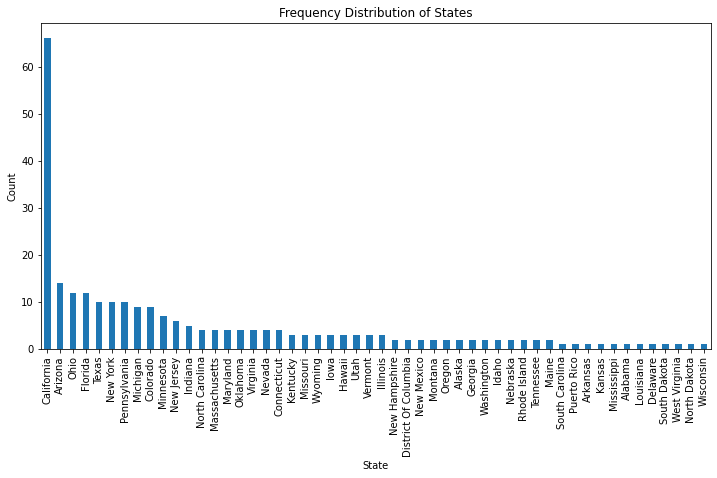

All states are not equally represented.
California has 66 sites that reported, while Delaware and Alabama have only one site that reported AQI.


In [45]:
# Calculate the frequency distribution of the states
state_counts = aqi['state_name'].value_counts()

# Plot the frequency distribution of states
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Frequency Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

print('All states are not equally represented.')
print('California has 66 sites that reported, while Delaware and Alabama have only one site that reported AQI.')

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

In [43]:
# Summarize the mean AQI for RRE states.

# Create a list of RRE states.
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.
aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


### Construct a boxplot visualization for the AQI of these states

In [46]:
# Import seaborn as sns.
import seaborn as sns

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

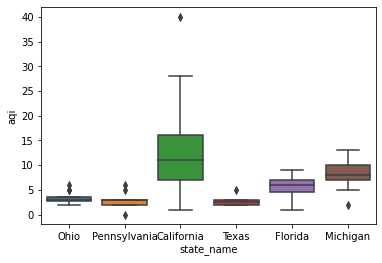

In [47]:
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

- California: The mean and a signficant portion of the boxplot range over 10.
- Michigan: While the mean is below 10, the boxplot ranges above 10.

### Construct a confidence interval for the RRE state with the highest mean AQI

### Construct your sample statistic

To contruct the sample statistic, we need to find the mean AQI for our state.

In [48]:
# Finding the mean aqi for out state.
aqi_ca = aqi[aqi['state_name']=='California']

sample_mean = aqi_ca['aqi'].mean()
sample_mean

12.121212121212121

### Choosing your confidence level

The most typical confidence level chosen is 95%; however, we can choose 90% or 99% if we want to decrease or increase our level of confidence about our result.

In [49]:
# Input your confidence level here:

confidence_level = 0.95
confidence_level

0.95

### Find your margin of error (ME)

The **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level.
To calculate the margin of error:

- Find z-value. 
- Find the approximate z for common confidence levels.
- Calculate **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [51]:
# Calculate margin of error.
# Identifying the z associated with chosen confidence level.

z_value = 1.96

# Next, calculate standard error.
standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

print()

# Lastly, use the preceding result to calculate margin of error.
margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412

margin of error:
1.7614930896609726


### Calculate interval

Calculating both lower and upper limit surrounding our sample mean to create our interval.

In [52]:
# Calculate your confidence interval (upper and lower limits).

upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(10.359719031551148, 13.882705210873095)

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [55]:
# Import stats from scipy.

from scipy import stats
stats.norm.interval(alpha=confidence_level, loc=sample_mean, scale=standard_error)

(10.359751399400034, 13.882672843024208)

## Step 4: Results

# Considerations

**Key takeaways from the analysis of AQI data in the states where RRE operates:**

**Mean AQI for RRE States:**
California and Michigan were most likely to have experienced a mean AQI above 10, with California exhibiting the highest sample mean AQI in the data.

**Impact on California:**
California seems to be the state most likely to be affected by a policy change, given its high mean AQI.
A 95% confidence interval for the mean AQI in California was estimated between 10.36 and 13.88, suggesting a high likelihood that the true population mean AQI falls within this range. This interval is significantly higher than the threshold AQI level of 10.

**Variation in Confidence Level:**
Adjusting the confidence level to 99% widened the confidence interval range to [9.80, 14.43], demonstrating how changing the confidence level impacts the interval width.

**Methodology and Presentation:**
Present the analytical process in a clear and structured notebook format, explaining the methodology behind the analysis and confidence interval construction.
Share the implications of different confidence levels for external stakeholders, emphasizing the statistical interpretation and the potential impact on policy decisions.

**Statistical Significance:**
At a high level, statistical significance measures the likelihood that an observed difference or relationship is not due to chance. For AQI, significance may relate to the consistency of AQI levels in California compared to other states.

**Shortcomings and Recommendations:**
Potential shortcomings include the limited time period considered in the analysis, which may affect the reliability and generalizability of the findings.
Given the observed high mean AQI in California, focus efforts on this state to further investigate the root causes and potential policy measures.

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 